# Model Prediction Results Evaluation


In this notebook, predictions are compared with each other.
Pickled Dataframe was retrieved from the Google Colab service, where file [Models.ipynb](Models.ipynb) was executed. The resulting Dataframe consists of true labels, their fold, and filename + prediction results for each dataset augmentation technique. The size of this dataset is double of original, as we are storing results for both original recordings and their augmented version. Each column in ['dist', 'mixup', 'imixup', 'room', 'warp', 'delay', 'spectrum', 'all'] is effectively storing model prediction results for 10 different runs, as the dataset is split into 10 folds.

To achieve consistent and reliable verdict, metrics should be averaged over folds, (hopefully) excluding randomness in the training process.

As the data in question implies a typical categorization task, typical metrics for this problem are known. In other domains, one most commonly sees accuracy, precision, recall, and f1 metrics. One relevant paper also uses a metric usually found in recomender systems: Mean Average Precision at k (MAP@k). In this word, we will refrain from stating dozens of metrics describing the same problem. What is most important here is an absolute performance measure and cross-class dependencies. The first allows us to compare different augmentation techniques in general, while the latter allows us to highlight unexpected issues between certain classes.

In particular, classes like jackhammer and air_conditioner are very hard to distinguish in this task. It should be noticed if a model performs better than alternative models in categorizing such confusing samples. Also, note that the desired metric has to be averaged over fold runs and classes. In such cases, such an approach will allow us to generalize over folds while keeping the effect of each class significant.


In [1]:
import sys
import os
sys.path.append(os.path.abspath("py/"))

from helpers import *
from setup import *


#names = ['spectrum','dist','mixup','imixup','room','warp','delay','image_only','audio_only','audio_only_nd', 'all']
names = ['spectrum','dist','mixup','imixup','room','warp','delay','image_only','audio_only', 'all']

Note that the experiments were repeated for multiple versions of the model. In most cases, models different in their base_model and its configuration. While not considered in the evaluation, there were tries based on ResNet101 with preloaded weights or not. Final experiments were run on two versions of EfficientNetV2B1 and EfficientNetV2B2. These are newer models, compared to ResNet, that have less weight and also showcase better performance.

# EfficientNet V2B1 Results


In [2]:
df = pd.read_pickle('../EfNetV2B1Res.pkl')
df.head()  # How the data looks like

,slice_file_name,fold,class,source,dist,mixup,imixup,room,spectrum,warp,delay,all,image_only,audio_only,audio_only_nd
0,57320-0-0-39.wav,1,air_conditioner,o,children_playing,air_conditioner,air_conditioner,air_conditioner,children_playing,children_playing,dog_bark,air_conditioner,dog_bark,air_conditioner,air_conditioner
1,134717-0-0-6.wav,1,air_conditioner,o,street_music,air_conditioner,air_conditioner,air_conditioner,air_conditioner,engine_idling,air_conditioner,engine_idling,air_conditioner,street_music,air_conditioner
2,57320-0-0-31.wav,1,air_conditioner,o,dog_bark,air_conditioner,air_conditioner,dog_bark,dog_bark,dog_bark,dog_bark,air_conditioner,dog_bark,air_conditioner,children_playing
3,134717-0-0-15.wav,1,air_conditioner,o,engine_idling,air_conditioner,air_conditioner,air_conditioner,air_conditioner,air_conditioner,engine_idling,engine_idling,siren,street_music,air_conditioner
4,177621-0-0-27.wav,1,air_conditioner,o,engine_idling,engine_idling,jackhammer,air_conditioner,engine_idling,jackhammer,jackhammer,air_conditioner,engine_idling,engine_idling,engine_idling


In [3]:
acc = get_accuracy_table(df, names=names)
summarize_table_to_latex(acc, "EfficientNetV2B1", names = names)
acc

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:375: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  lt = t.to_latex(index=True, float_format="%.2f")


,spectrum,dist,mixup,imixup,room,warp,delay,image_only,audio_only,all
1,0.610000,0.650000,0.570000,0.720000,0.845000,0.740000,0.685000,0.735000,0.675000,0.725000
2,0.553333,0.616667,0.623333,0.676667,0.693333,0.671667,0.650000,0.643333,0.756667,0.685000
3,0.680000,0.571667,0.570000,0.630000,0.521667,0.648333,0.710000,0.705000,0.670000,0.730000
4,0.503930,0.515267,0.539332,0.635615,0.526176,0.392620,0.545695,0.484278,0.630668,0.609759
5,0.670000,0.676667,0.755000,0.675000,0.693333,0.630000,0.610000,0.705000,0.711667,0.730000
6,0.622308,0.537308,0.512500,0.662500,0.555000,0.615000,0.597308,0.627115,0.602500,0.697500
7,0.555833,0.628333,0.485000,0.640833,0.569167,0.787500,0.487500,0.680000,0.662500,0.700000
8,0.625000,0.630000,0.715000,0.702778,0.668889,0.670000,0.635000,0.723889,0.725000,0.750000
9,0.645556,0.550556,0.554444,0.687778,0.647778,0.577222,0.570556,0.702778,0.657778,0.765000
10,0.652778,0.657778,0.672778,0.732778,0.662778,0.707778,0.702778,0.778889,0.758889,0.762778


/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:353: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


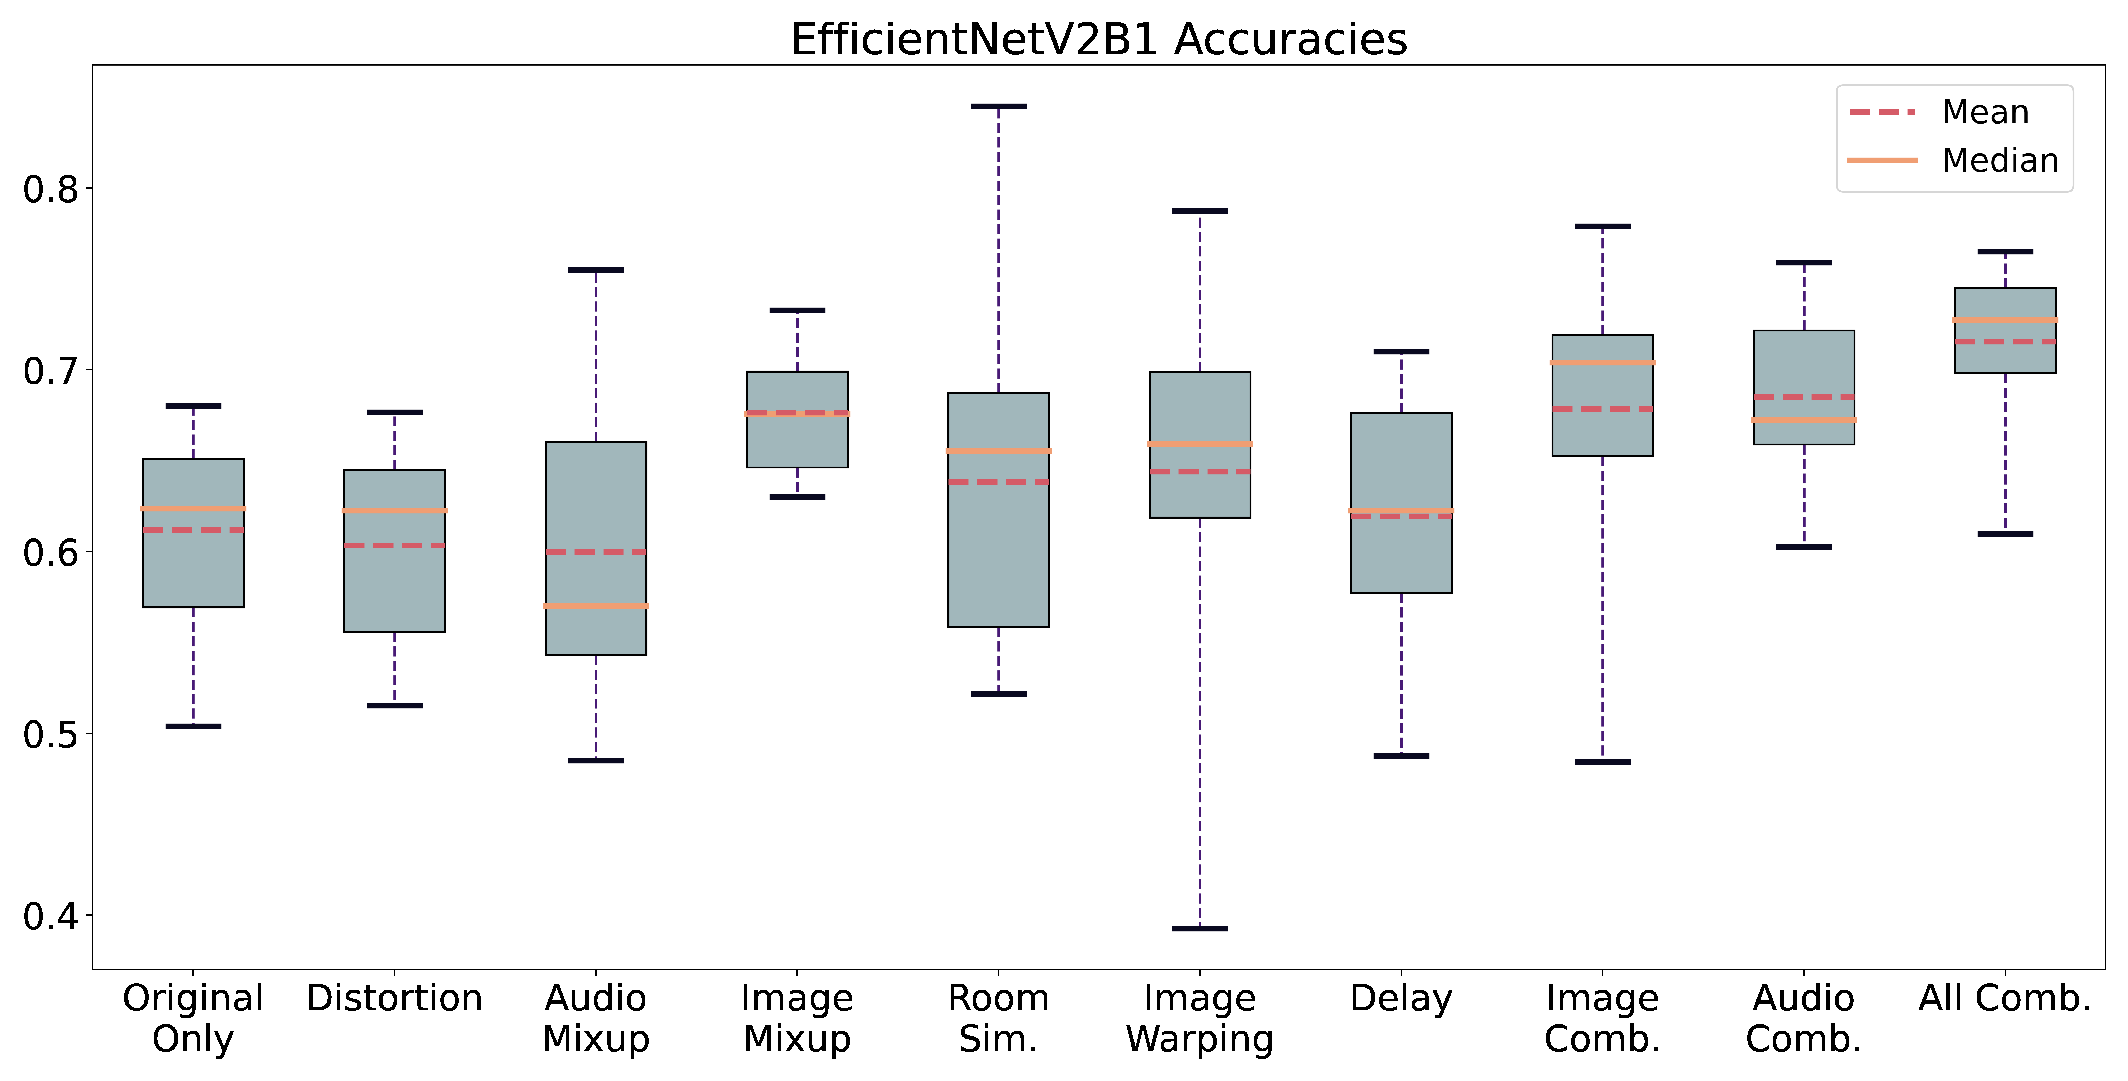

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(acc, names=names,
           label='EfficientNetV2B1 Accuracies'), interpolation='nearest')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:353: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


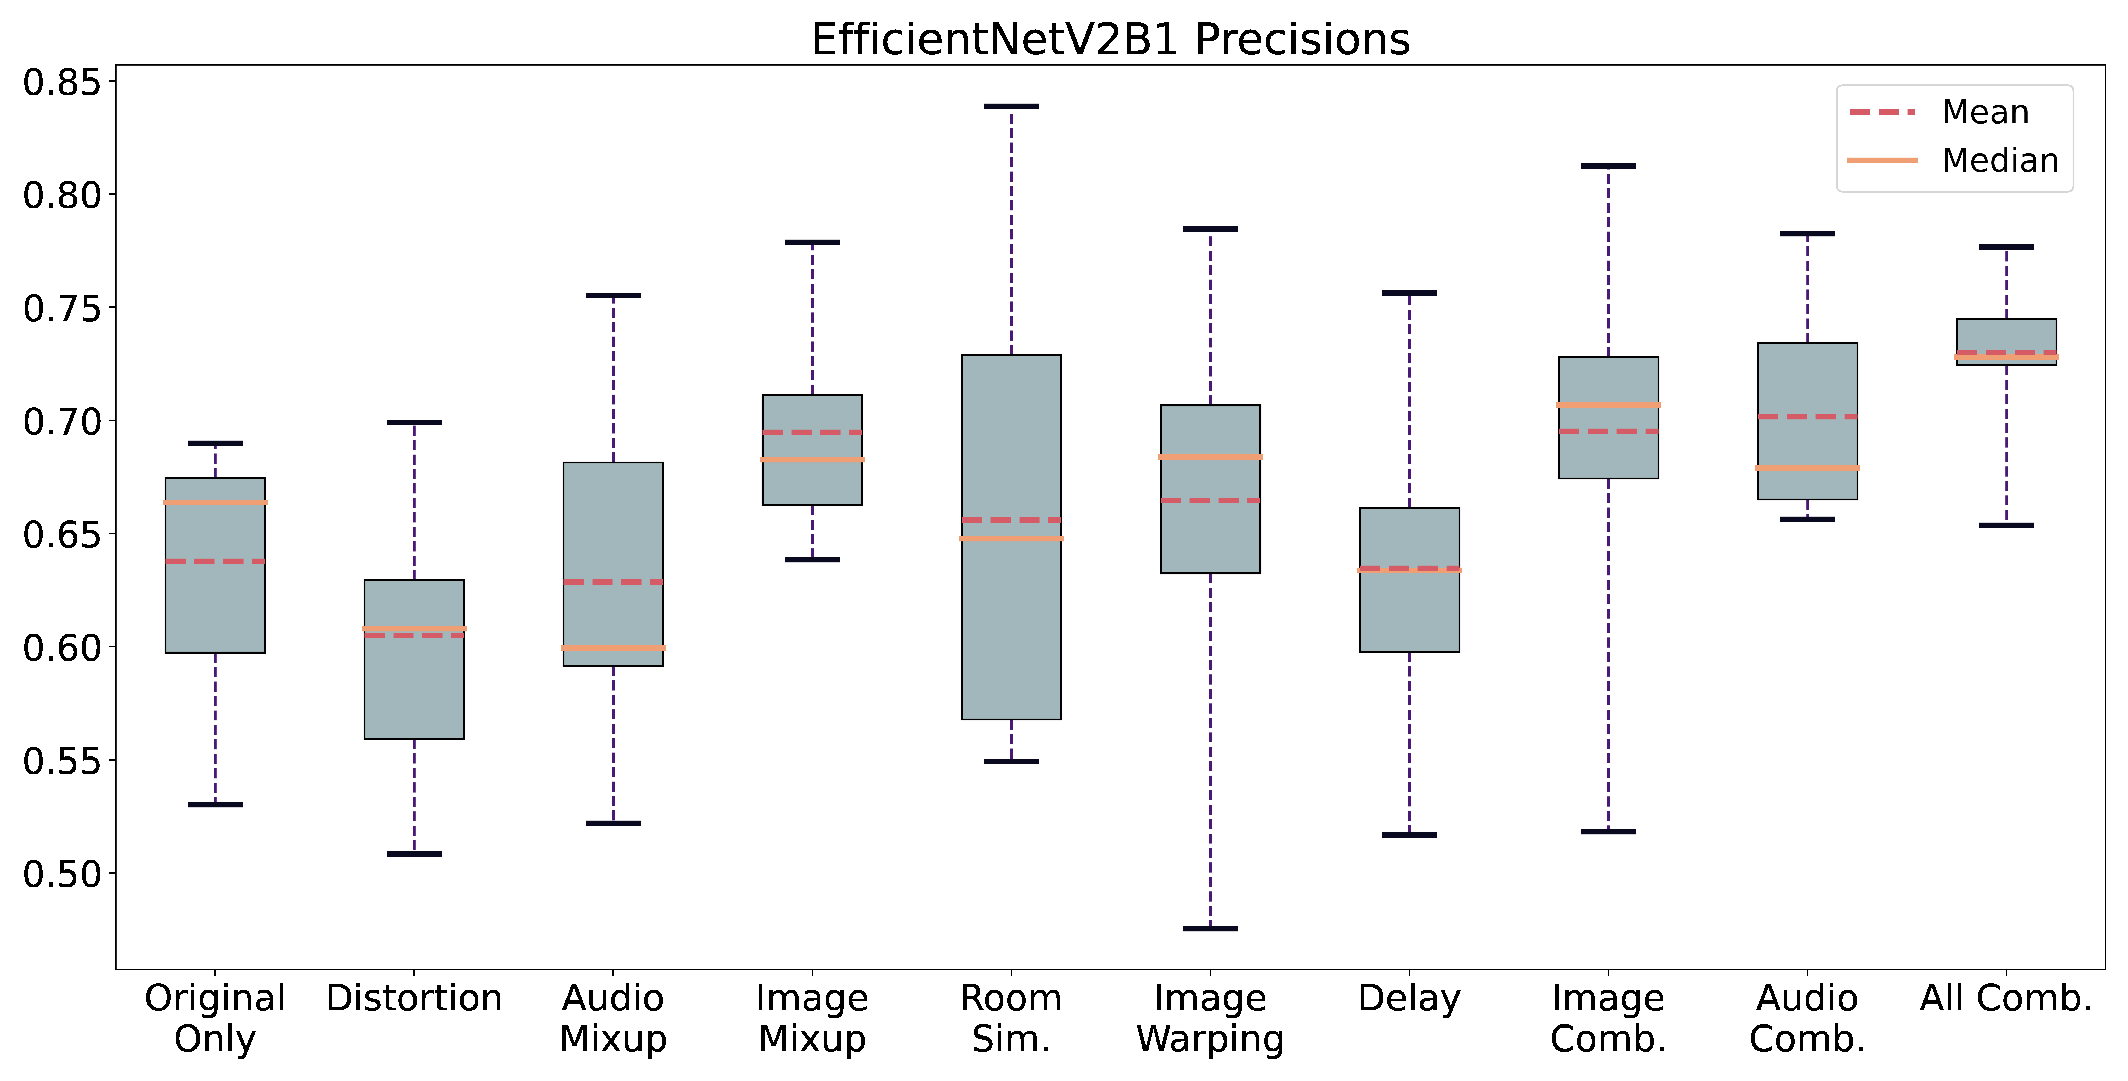

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='precision'),
           names=names, label='EfficientNetV2B1 Precisions'), interpolation='nearest')
plt.show()

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:353: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


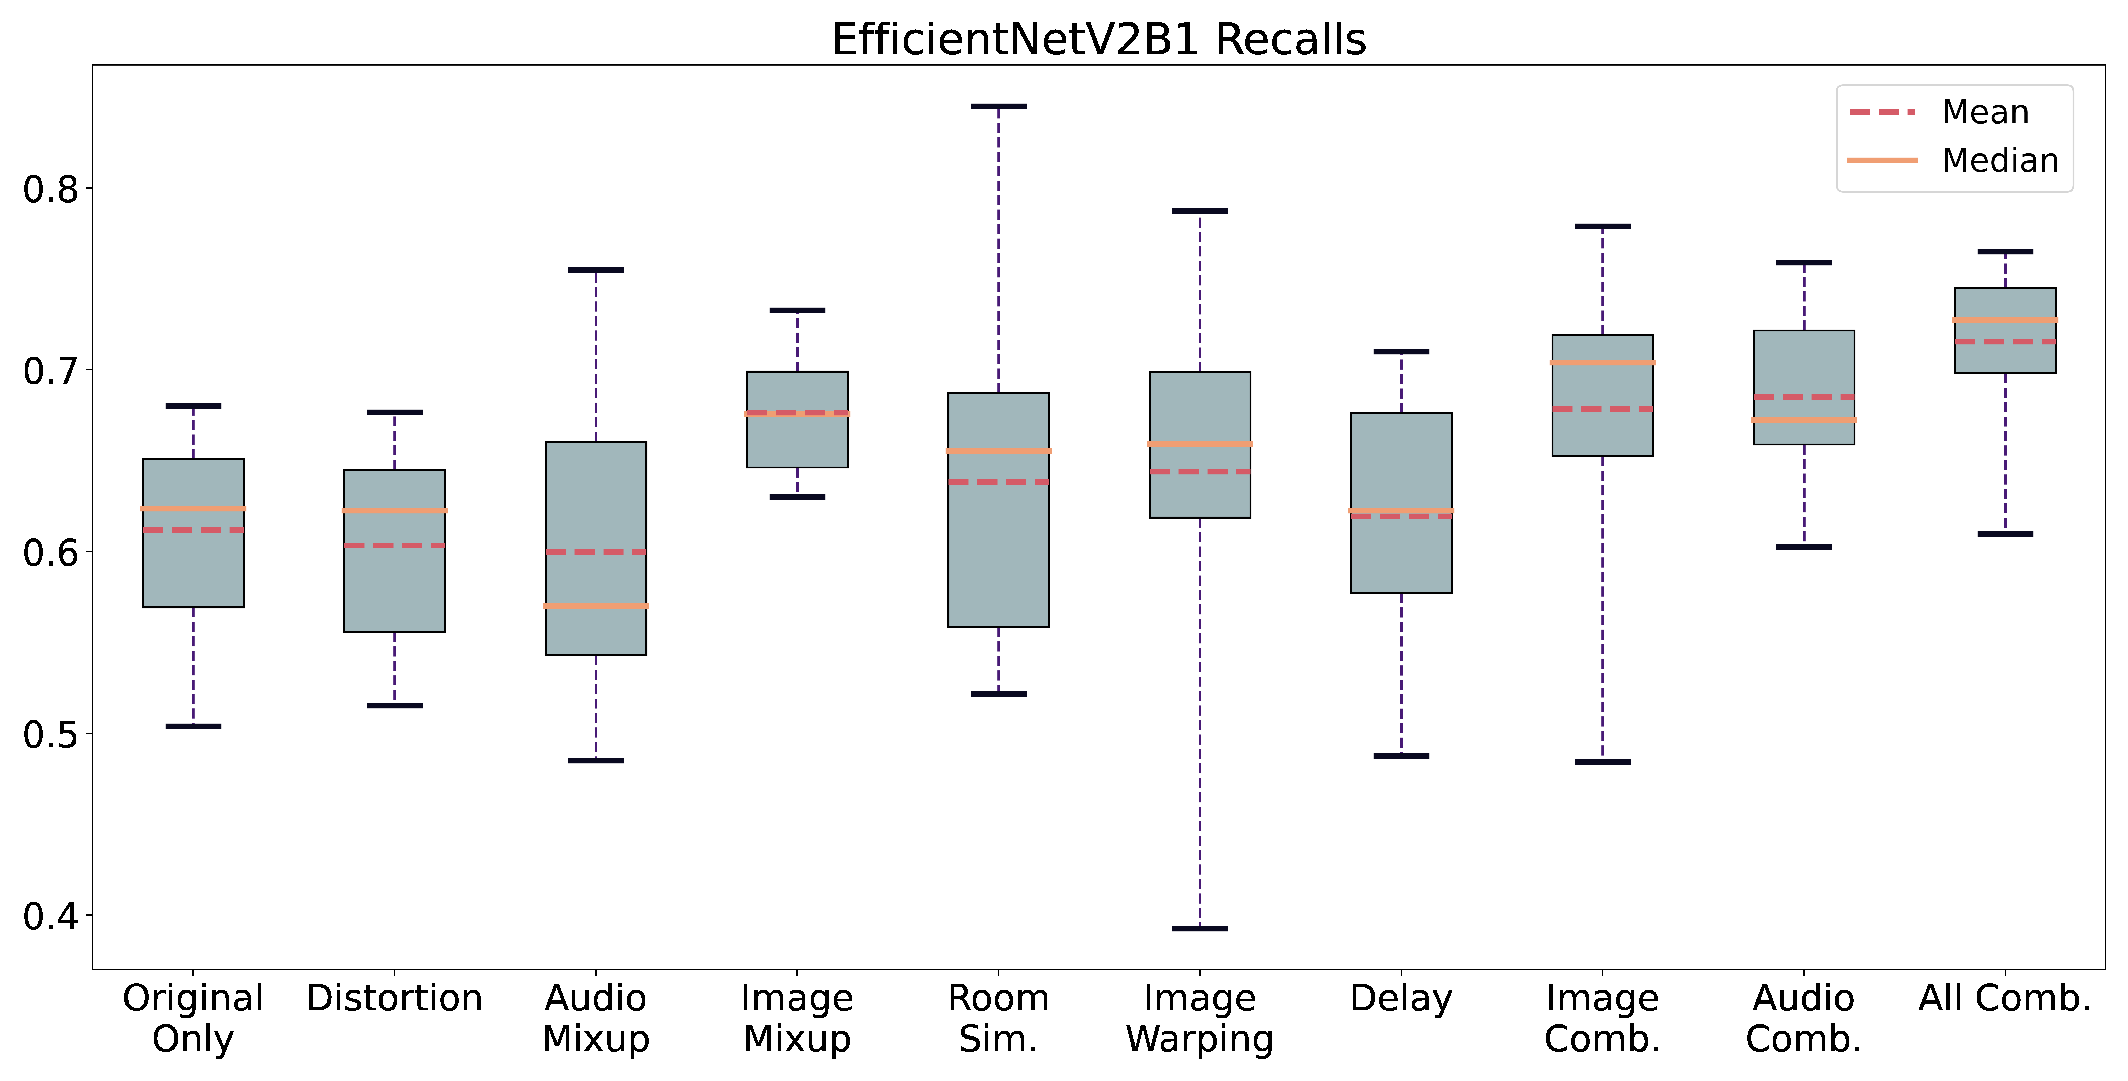

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='recall'),
           names=names, label='EfficientNetV2B1 Recalls'), interpolation='nearest')
plt.show()

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:353: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


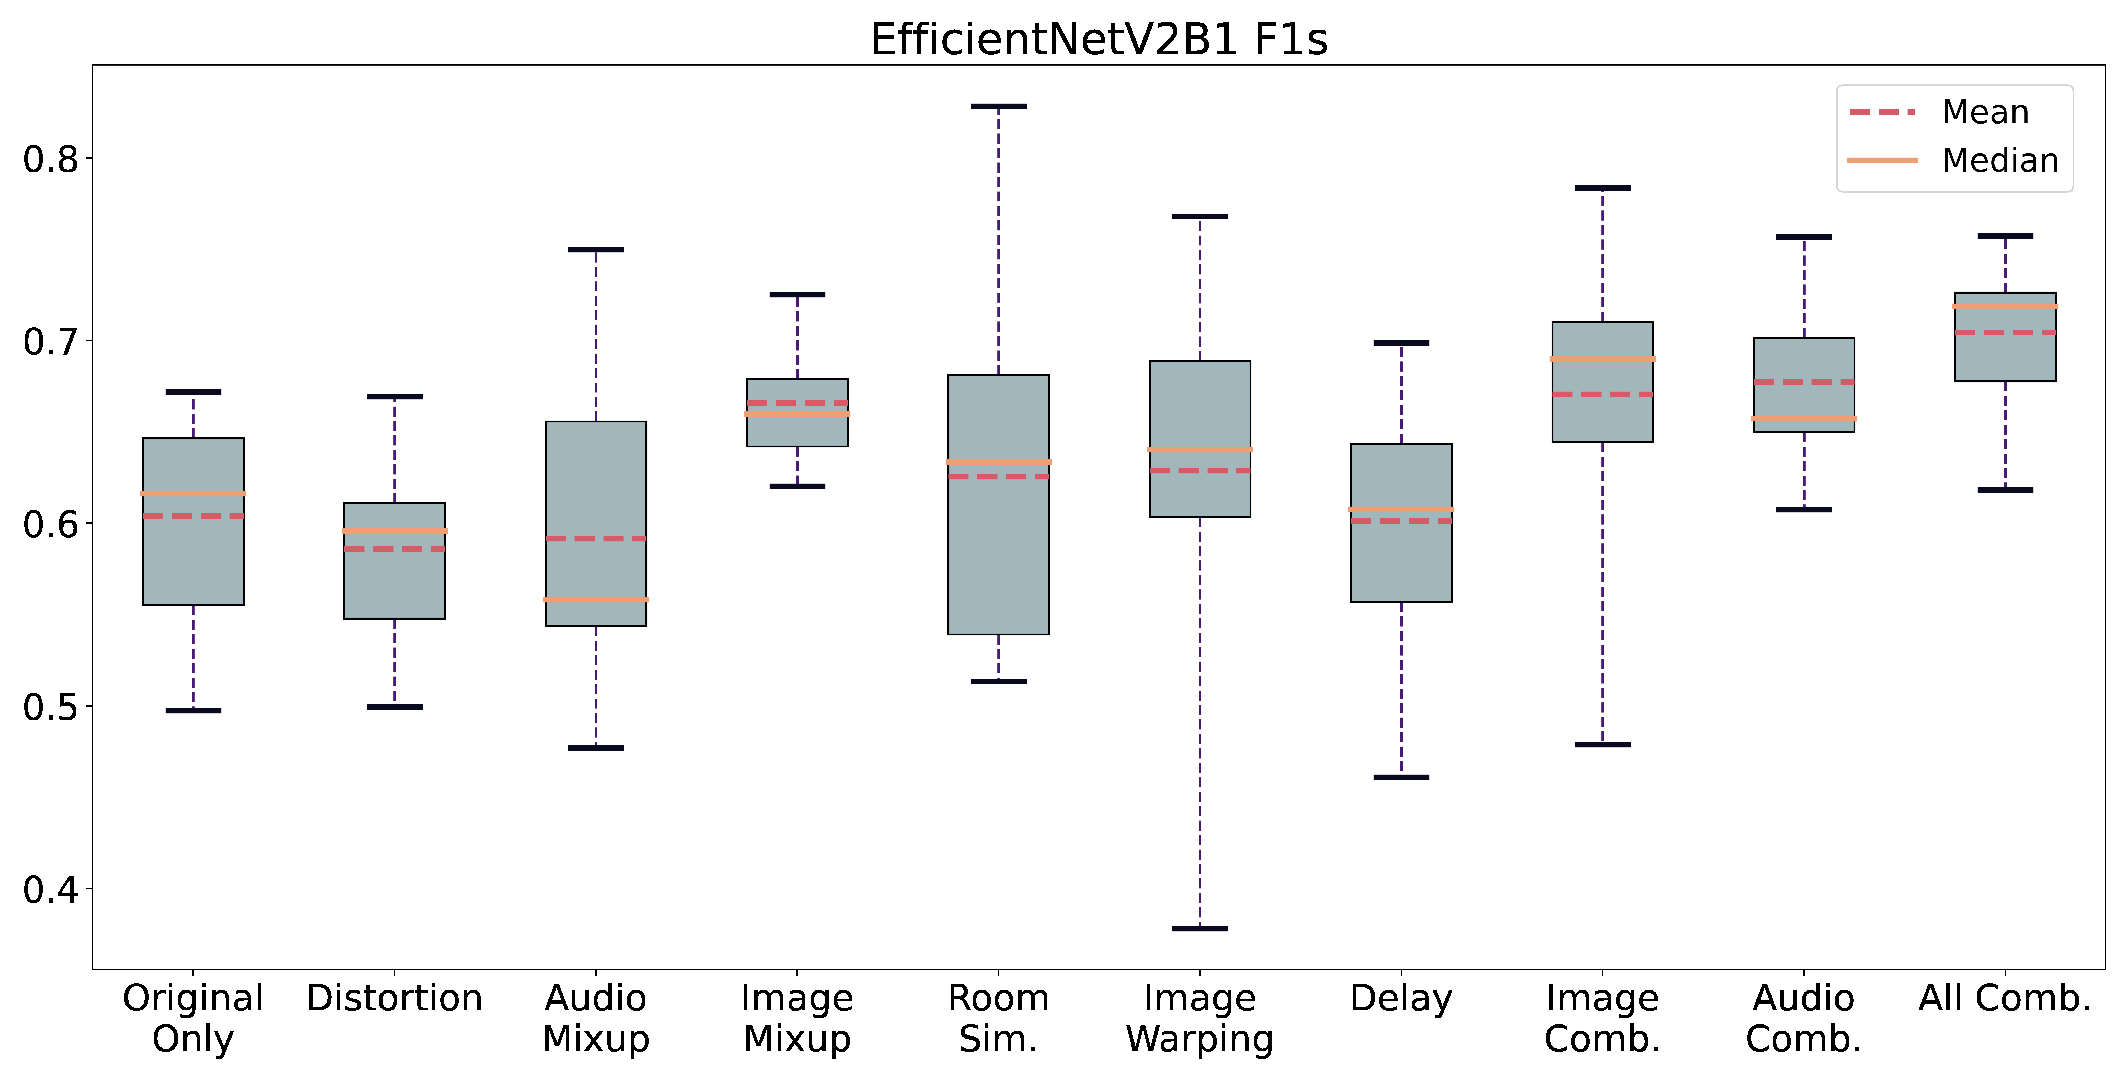

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='f1'),
           names=names, label='EfficientNetV2B1 F1s'), interpolation='nearest')
plt.show()

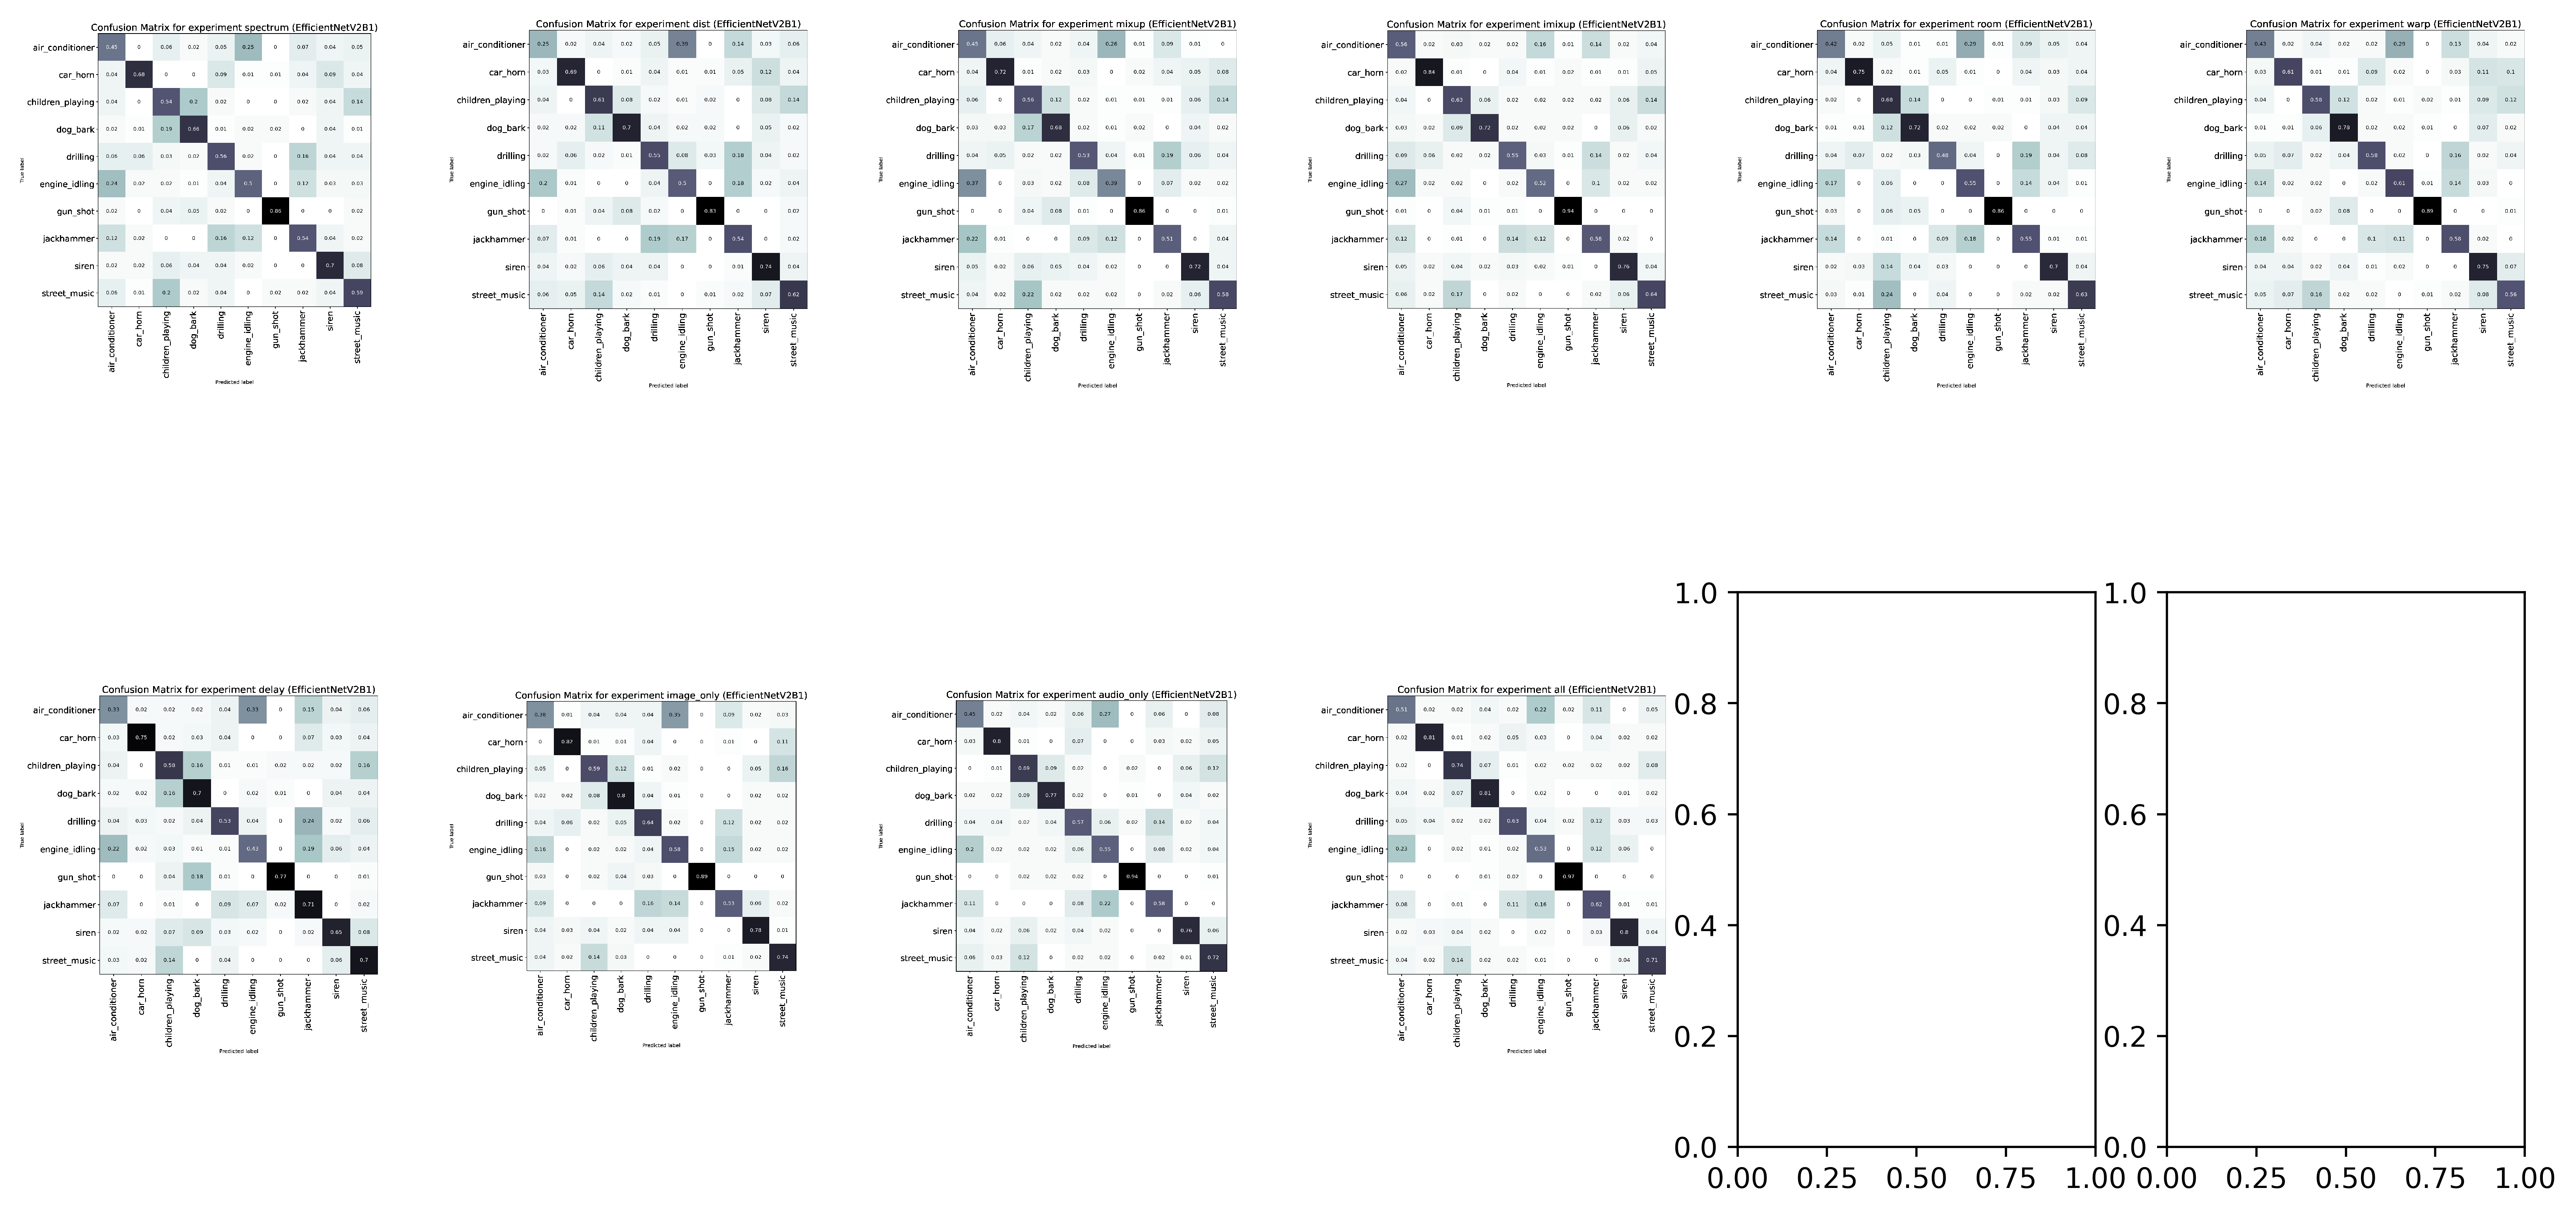

In [8]:
fig, axs = plt.subplots(2, 6, figsize=(16, 8), dpi=512)
r = 0
c = 0
for i, name in enumerate(names):
    r = i // 6
    c = i % 6
    axs[r][c].axis('off')
    axs[r][c].imshow(build_confusion_matrix(
        df, name, prefix="EfficientNetV2B1"), interpolation='nearest')
plt.show()

# EfficientNet V2B2 Results


In [9]:
df = pd.read_pickle('../EfNetV2B2Res.pkl')
df.head()  # How the data looks like

,slice_file_name,fold,class,source,dist,mixup,imixup,room,spectrum,warp,delay,all,image_only,audio_only,audio_only_nd
0,57320-0-0-39.wav,1,air_conditioner,o,children_playing,air_conditioner,air_conditioner,air_conditioner,children_playing,children_playing,dog_bark,air_conditioner,dog_bark,air_conditioner,air_conditioner
1,134717-0-0-6.wav,1,air_conditioner,o,street_music,air_conditioner,air_conditioner,air_conditioner,air_conditioner,engine_idling,air_conditioner,engine_idling,air_conditioner,street_music,air_conditioner
2,57320-0-0-31.wav,1,air_conditioner,o,dog_bark,air_conditioner,air_conditioner,dog_bark,dog_bark,dog_bark,dog_bark,air_conditioner,dog_bark,air_conditioner,dog_bark
3,134717-0-0-15.wav,1,air_conditioner,o,engine_idling,air_conditioner,air_conditioner,air_conditioner,air_conditioner,air_conditioner,engine_idling,engine_idling,siren,street_music,air_conditioner
4,177621-0-0-27.wav,1,air_conditioner,o,engine_idling,engine_idling,jackhammer,air_conditioner,engine_idling,jackhammer,jackhammer,air_conditioner,engine_idling,engine_idling,air_conditioner


In [10]:
acc = get_accuracy_table(df, names=names)
summarize_table_to_latex(acc, "EfficientNetV2B2", names = names)
acc

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:375: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  lt = t.to_latex(index=True, float_format="%.2f")


,spectrum,dist,mixup,imixup,room,warp,delay,image_only,audio_only,all
1,0.610000,0.650000,0.570000,0.720000,0.845000,0.740000,0.685000,0.735000,0.675000,0.725000
2,0.553333,0.616667,0.623333,0.676667,0.693333,0.671667,0.650000,0.643333,0.756667,0.685000
3,0.680000,0.571667,0.570000,0.630000,0.521667,0.648333,0.710000,0.705000,0.670000,0.730000
4,0.503930,0.515267,0.539332,0.635615,0.526176,0.392620,0.545695,0.484278,0.630668,0.609759
5,0.670000,0.676667,0.755000,0.675000,0.693333,0.630000,0.610000,0.705000,0.711667,0.730000
6,0.622308,0.537308,0.512500,0.662500,0.555000,0.615000,0.597308,0.627115,0.602500,0.697500
7,0.555833,0.628333,0.485000,0.640833,0.569167,0.787500,0.487500,0.680000,0.662500,0.700000
8,0.625000,0.630000,0.715000,0.702778,0.668889,0.670000,0.635000,0.723889,0.725000,0.750000
9,0.645556,0.550556,0.554444,0.687778,0.647778,0.577222,0.570556,0.702778,0.657778,0.765000
10,0.652778,0.657778,0.672778,0.732778,0.662778,0.707778,0.702778,0.778889,0.758889,0.762778


/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:353: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


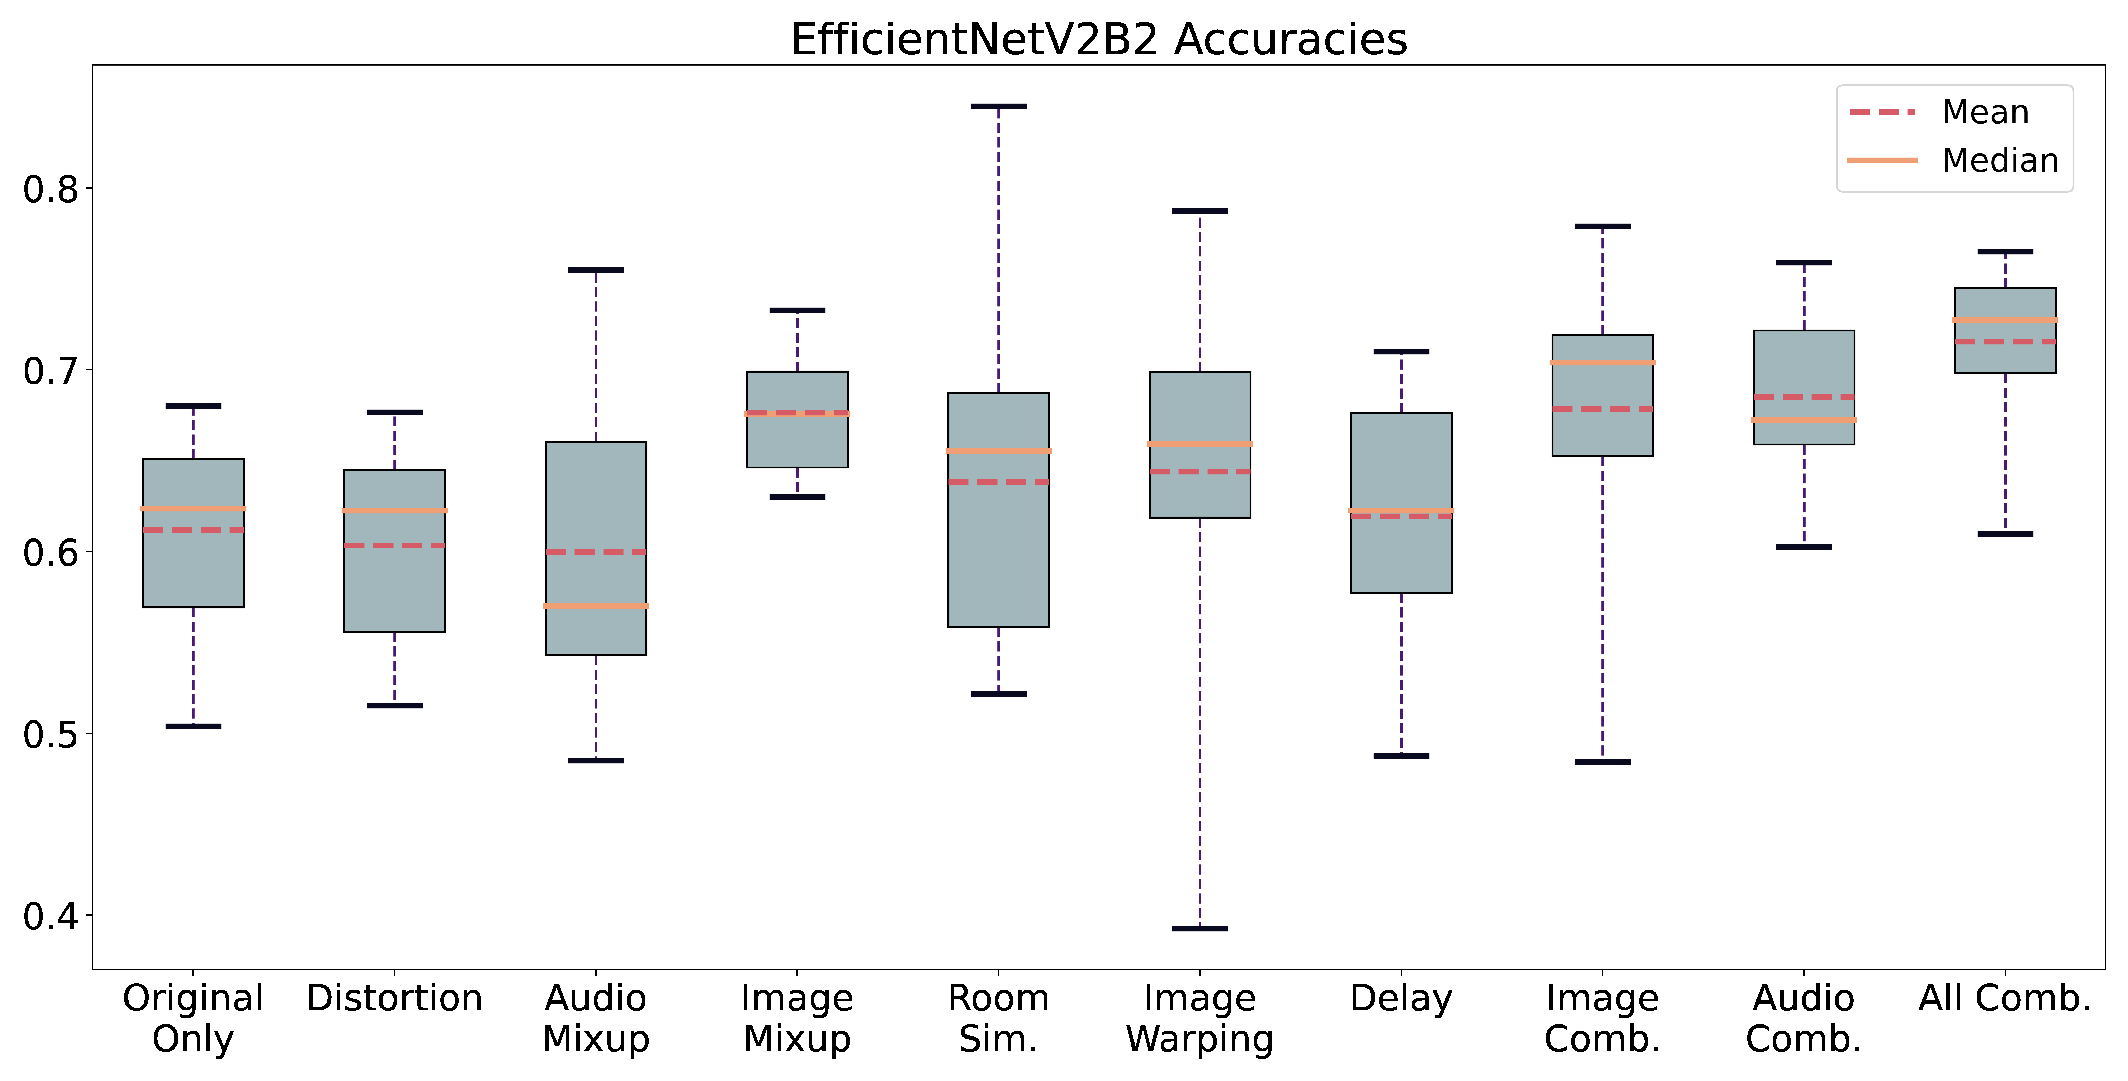

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(acc, names=names,
           label='EfficientNetV2B2 Accuracies'), interpolation='nearest')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:353: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


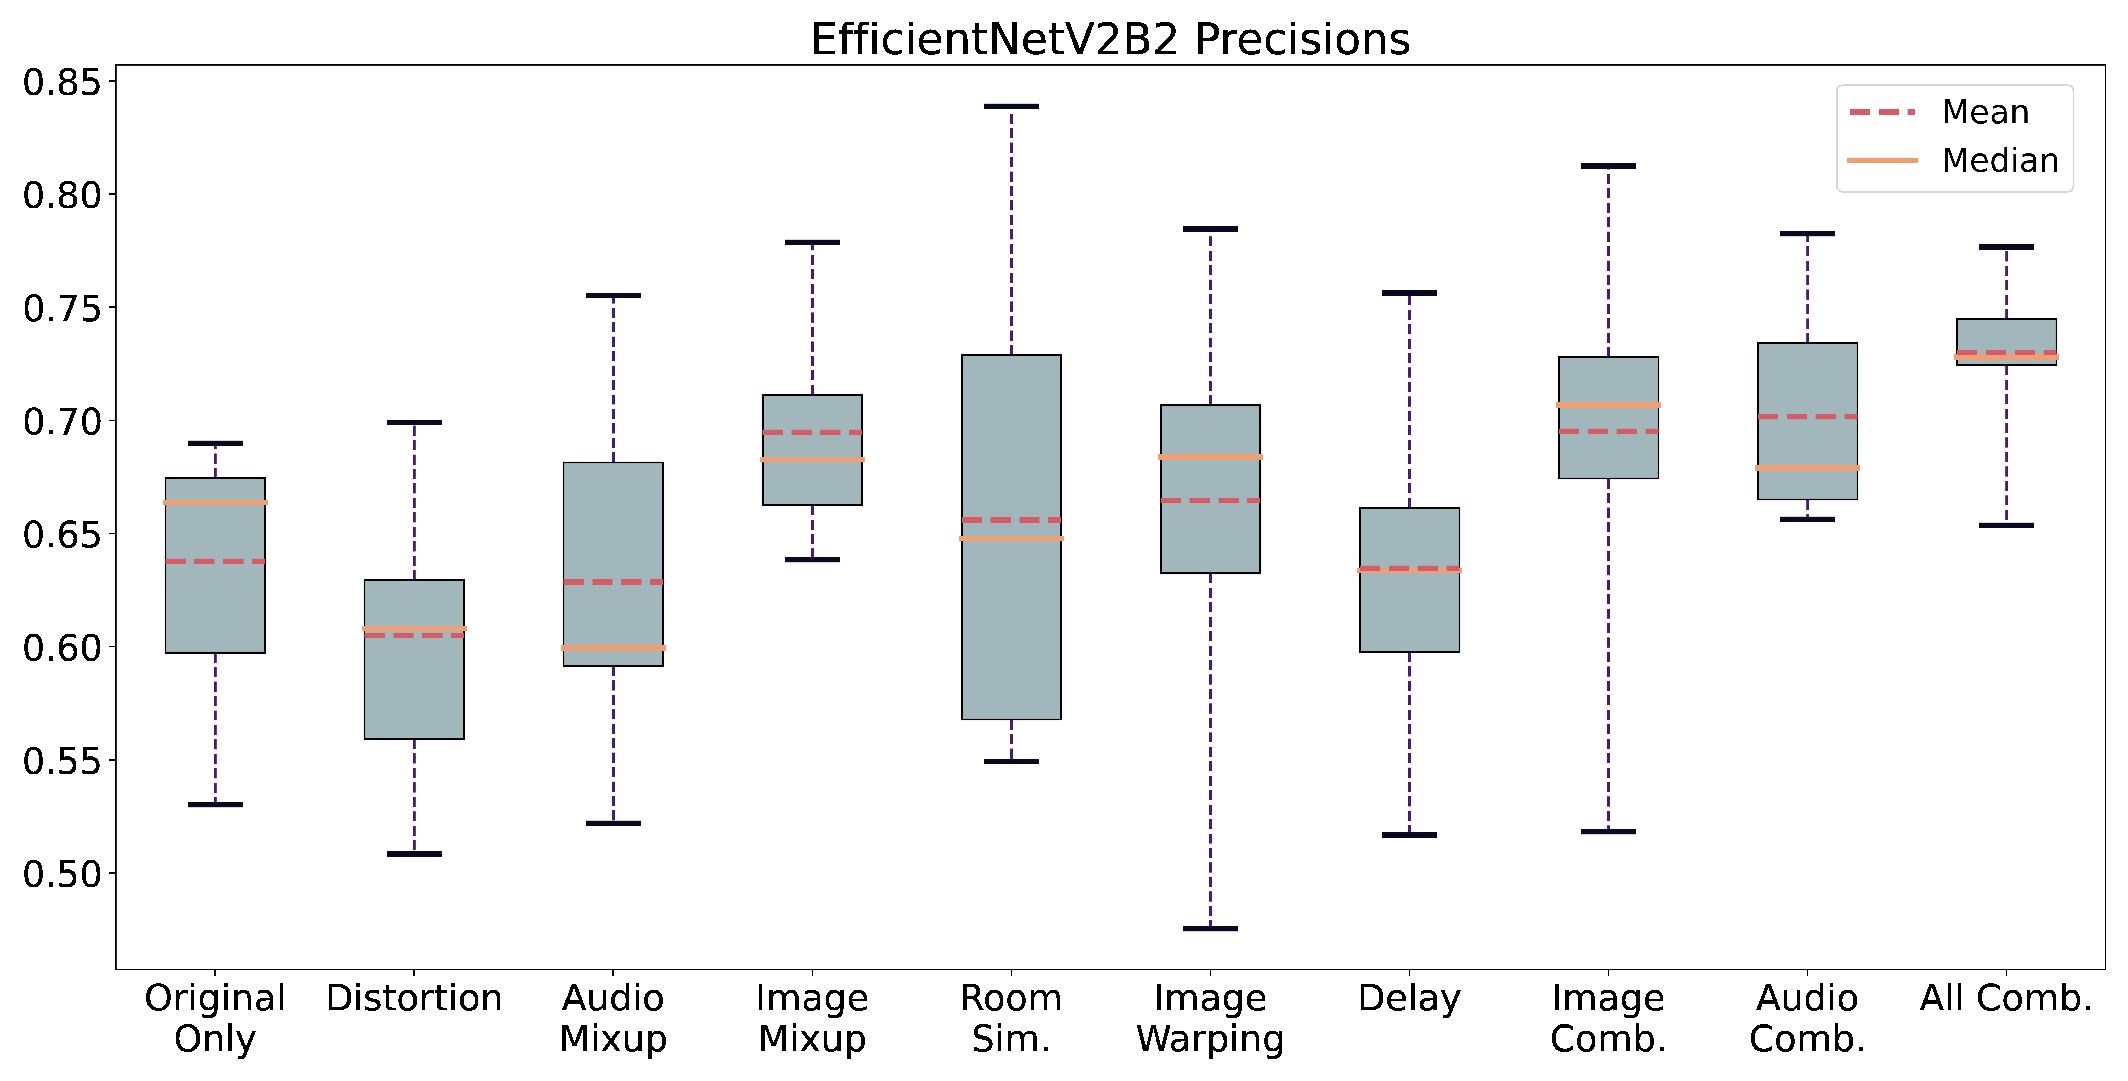

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='precision'),
           names=names, label='EfficientNetV2B2 Precisions'), interpolation='nearest')
plt.show()

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:353: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


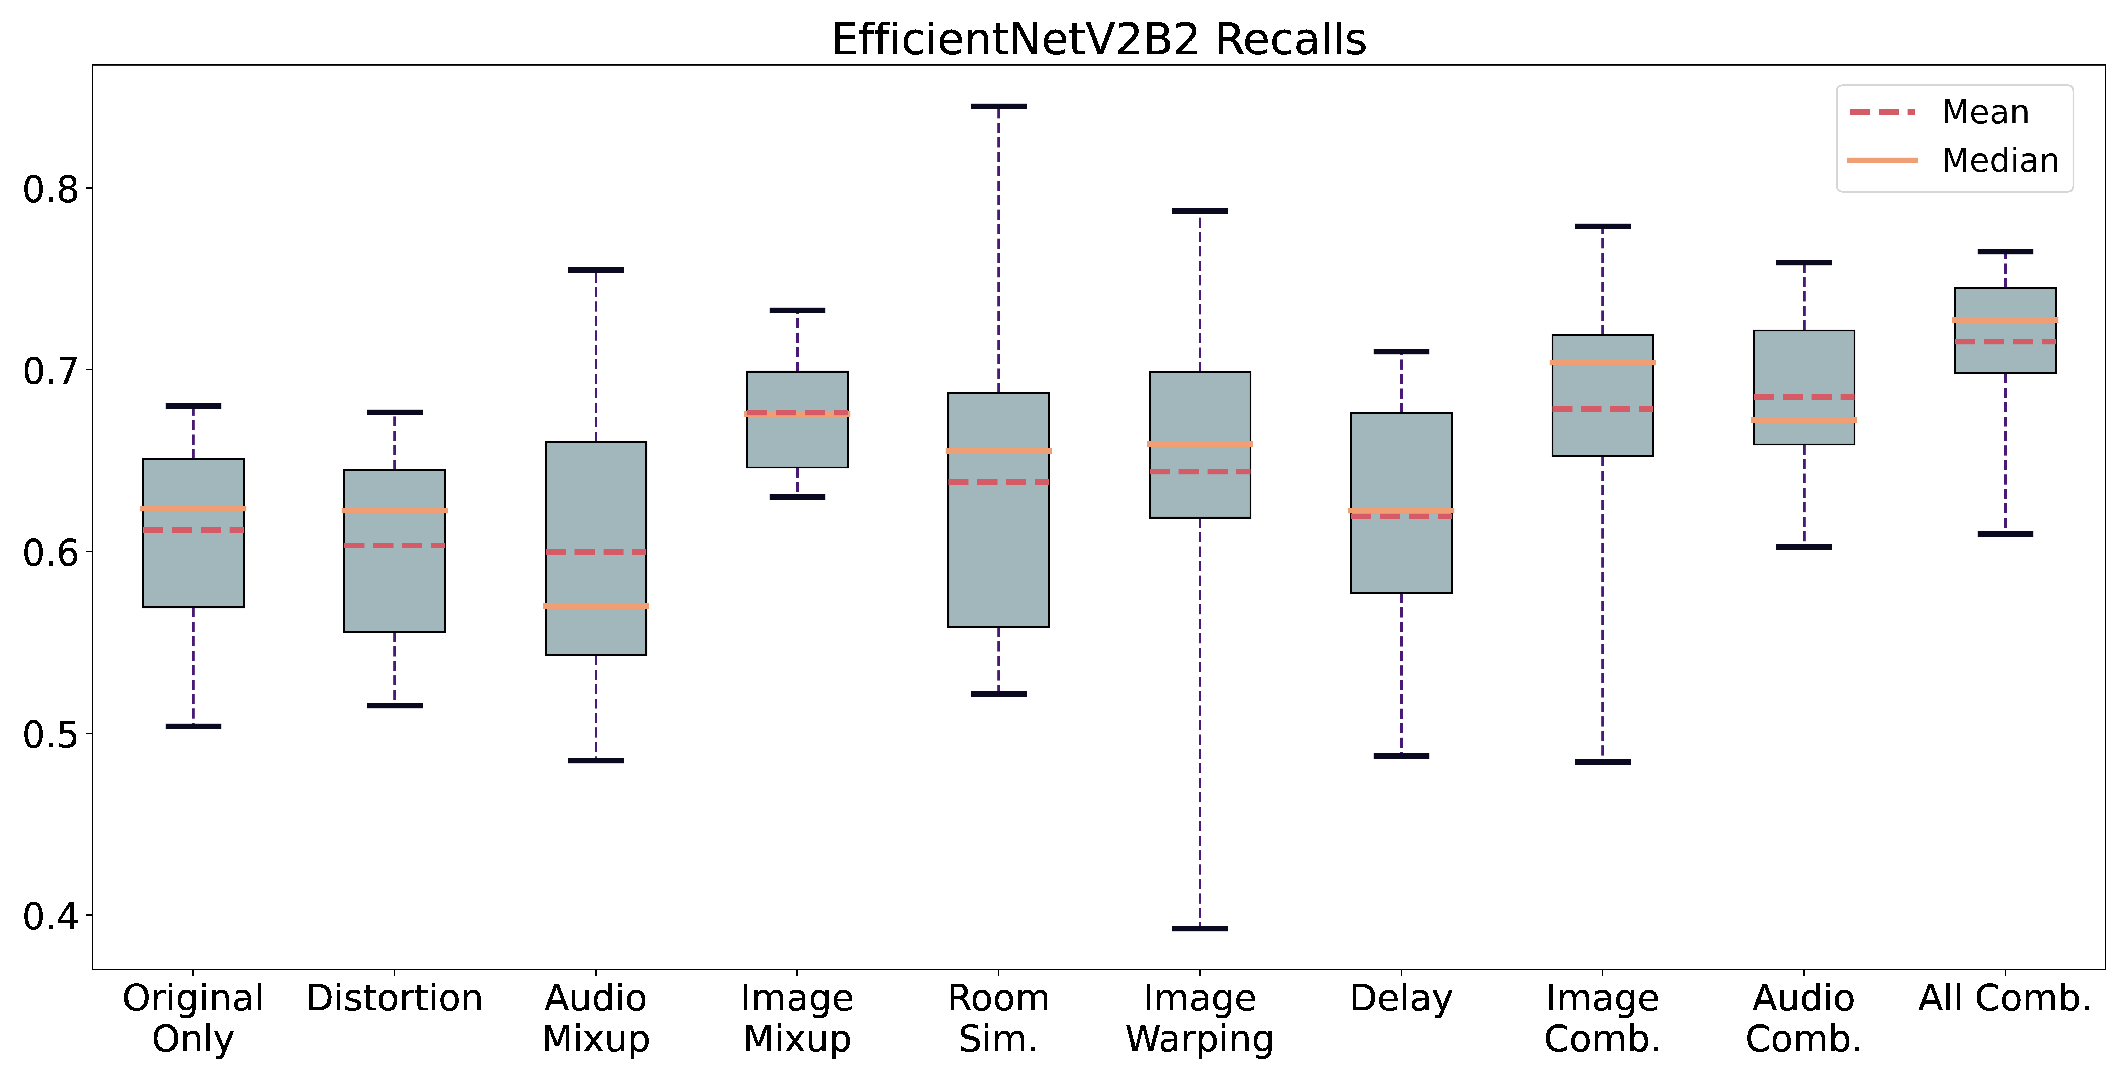

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='recall'),
           names=names, label='EfficientNetV2B2 Recalls'), interpolation='nearest')
plt.show()

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:353: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


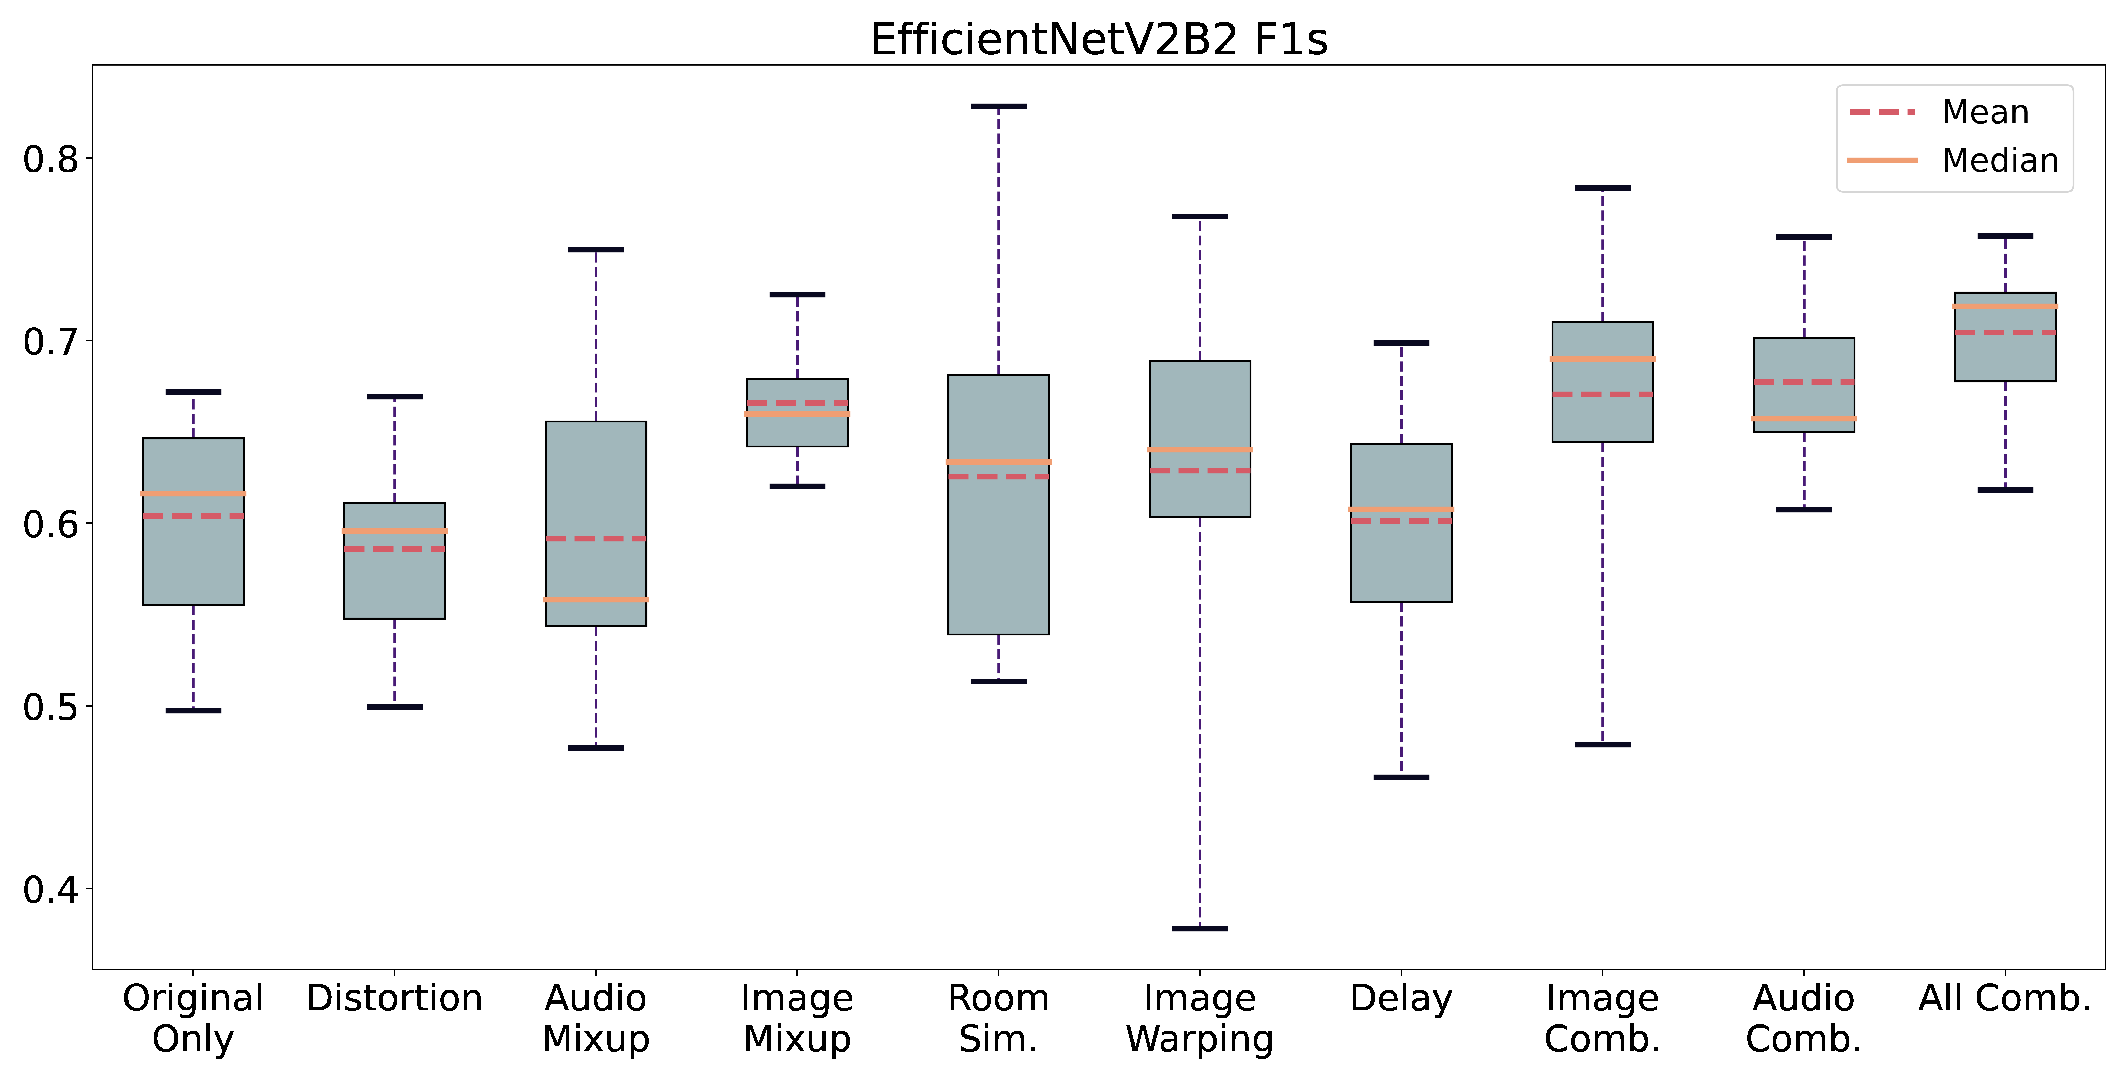

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='f1'),
           names=names, label='EfficientNetV2B2 F1s'), interpolation='nearest')
plt.show()

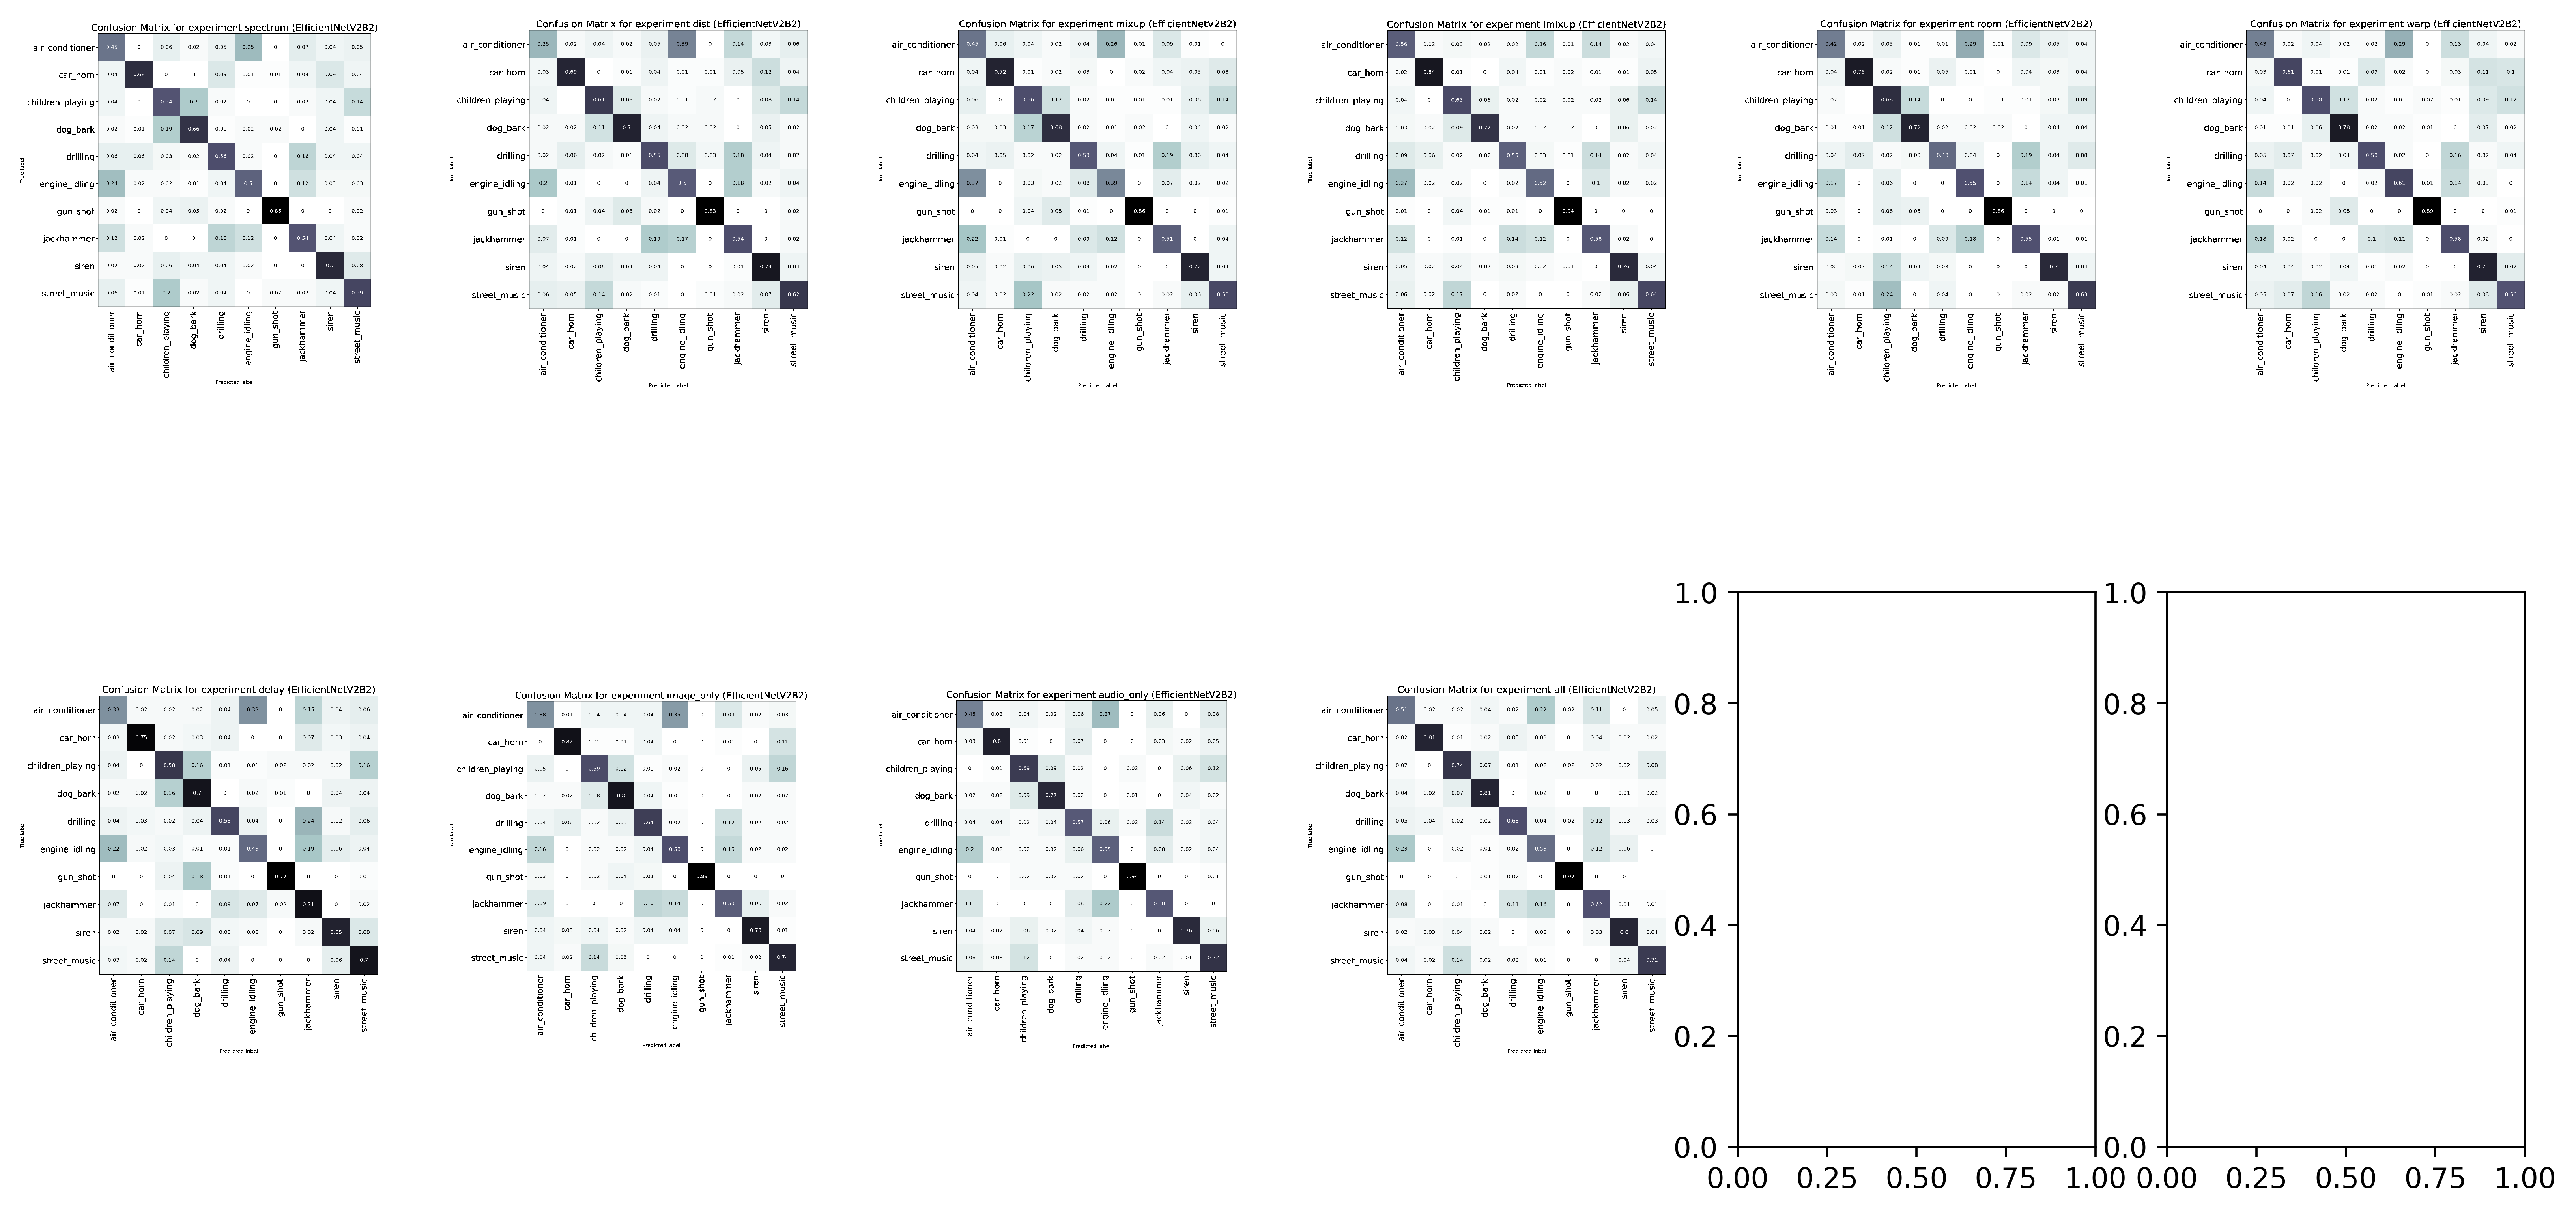

In [15]:
fig, axs = plt.subplots(2, 6, figsize=(16, 8), dpi=512)
r = 0
c = 0
for i, name in enumerate(names):
    r = i // 6
    c = i % 6
    axs[r][c].axis('off')
    axs[r][c].imshow(build_confusion_matrix(
        df, name, prefix="EfficientNetV2B2"), interpolation='nearest')
plt.show()

# ResNet50 V2 Results

Although it is possible to calculate all results for this model as well. It was not capable to learn properly on smaller datasets and can therefore be used to support findings from other models, but is really not the best illustration for the main purpose of this work.

In [16]:
df = pd.read_pickle('../ResNet50Res.pkl')
df.head()  # How the data looks like
acc = get_accuracy_table(df, names=names)
summarize_table_to_latex(acc, "ResNet50",names = names)
acc

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:375: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  lt = t.to_latex(index=True, float_format="%.2f")


,spectrum,dist,mixup,imixup,room,warp,delay,image_only,audio_only,all
1,0.1000,0.100000,0.460000,0.665000,0.555000,0.725000,0.270000,0.465000,0.600000,0.800000
2,0.1000,0.390000,0.508333,0.205000,0.100000,0.100000,0.508333,0.566667,0.571667,0.660000
3,0.1000,0.495000,0.295000,0.353333,0.508333,0.190000,0.100000,0.625000,0.665000,0.710000
4,0.1000,0.497567,0.100000,0.100000,0.244011,0.417594,0.362594,0.467540,0.374920,0.499840
5,0.1000,0.100000,0.185000,0.405000,0.100000,0.100000,0.100000,0.651667,0.648333,0.641667
6,0.1000,0.100000,0.160000,0.592500,0.100000,0.100000,0.100000,0.512500,0.584808,0.330000
7,0.3625,0.298333,0.370000,0.399167,0.100000,0.100000,0.452500,0.615000,0.705833,0.591667
8,0.1000,0.100000,0.100000,0.558333,0.651667,0.155000,0.100000,0.476111,0.527778,0.613889
9,0.1000,0.100000,0.223333,0.431667,0.100000,0.609444,0.359444,0.795000,0.634444,0.760000
10,0.1000,0.100000,0.634444,0.324444,0.529444,0.100000,0.390556,0.586667,0.650556,0.758889


/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:353: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


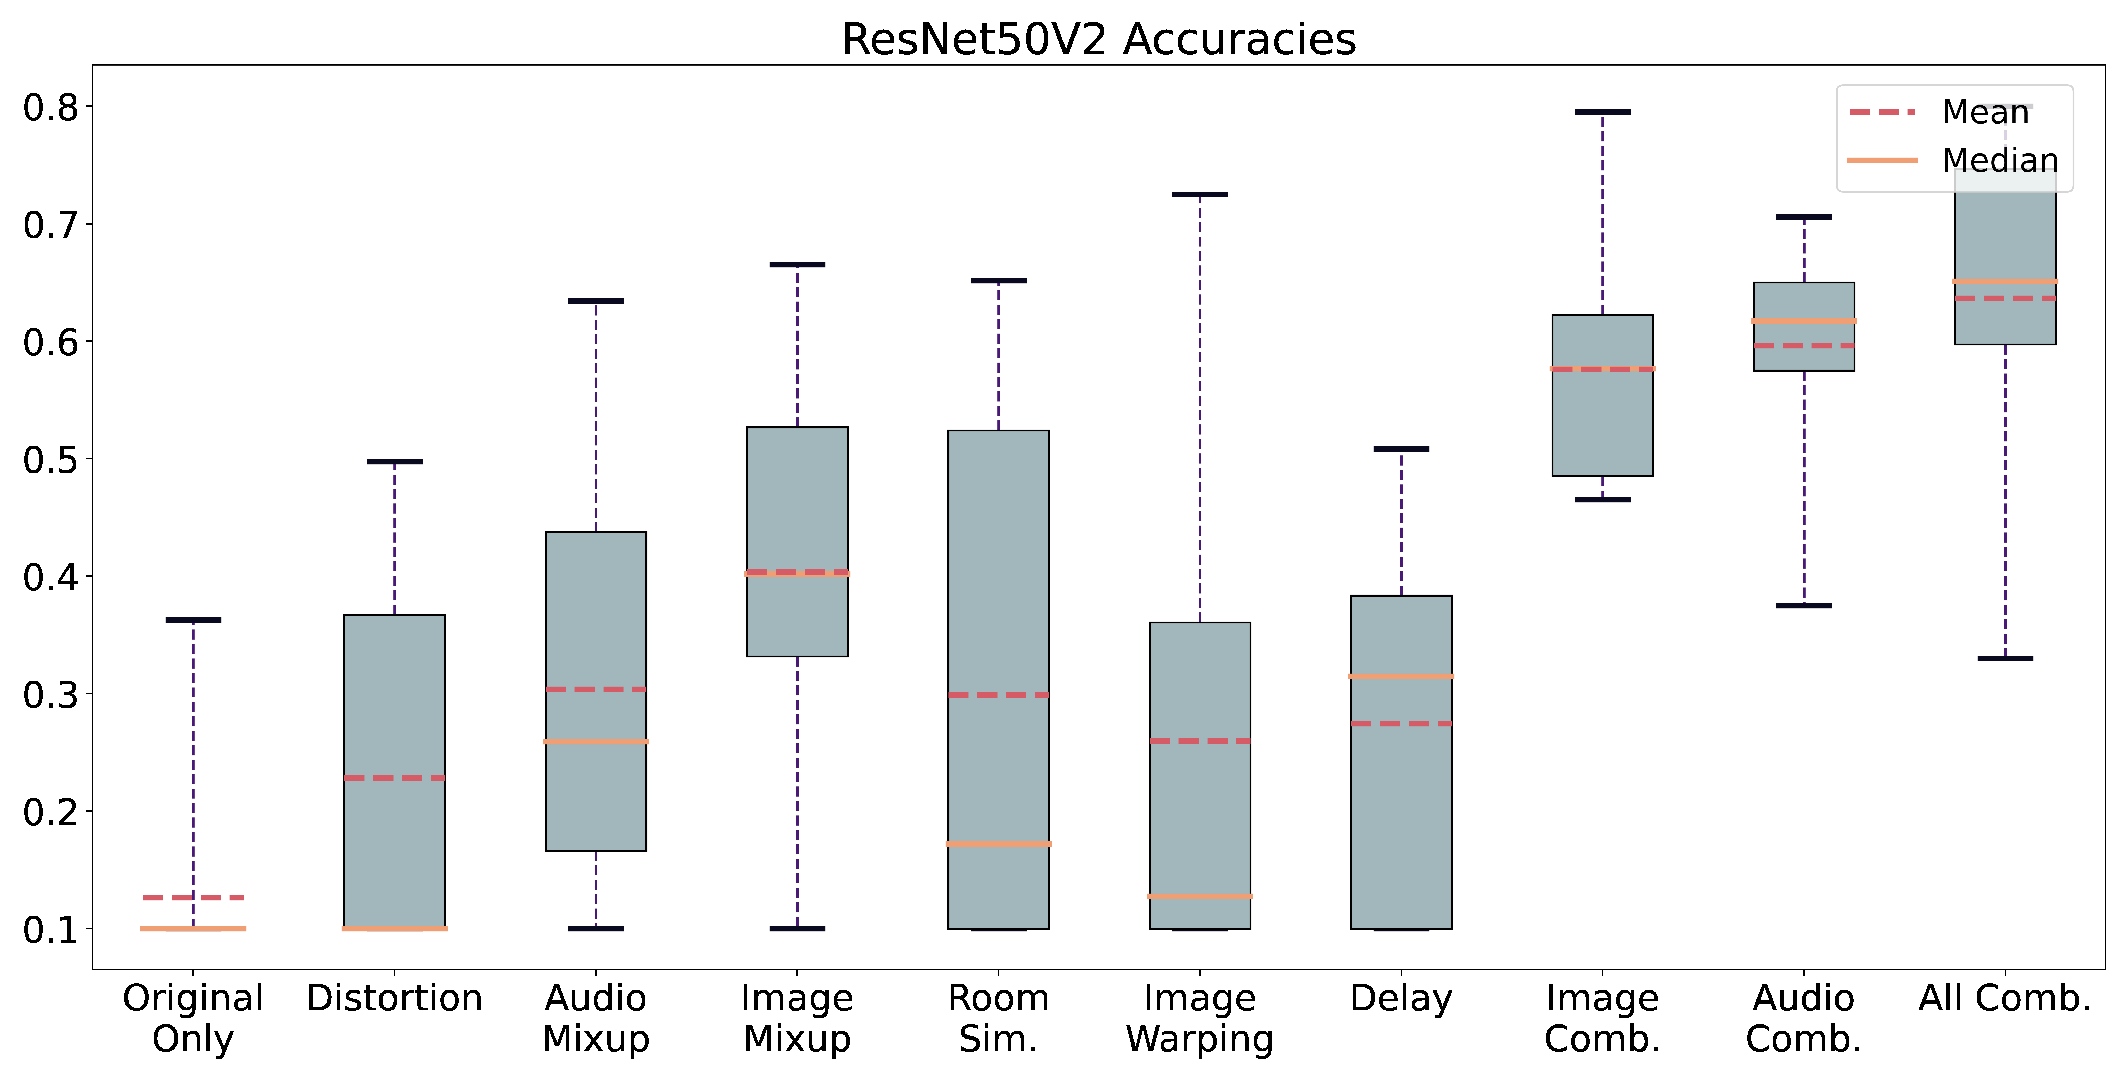

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(acc, names=names,
           label='ResNet50V2 Accuracies'), interpolation='nearest')
plt.show()

# Conclusion

As you can see, there is only a minor difference between individual augmentation techniques and raw ones. Multiple reasons can cause this:
1. The model of selection is capable enough to learn on a small portion of unedited data but is incapable of extracting helpful insight from its augmented clones;
2. Augmentation techniques are providing effects too similar for them to be significantly different;
3. The dataset itself is too small to create an impact

All of these can be argued. For example, the first argument does not hold because total accuracy is not that high (perhaps due to train and test data being too different). 2. Can be argued simply by visual insight that one can obtain. They are considerably different. 3. There was a separate run on a more significant portion of the data, and the results were almost identical.

Nonetheless, there is a clear benefit to employing such augmentation techniques:
1. While some augmentation techniques might have a negative impact, in every case, there is a benefit when specific calls have to be targeted.
2. Mixup, for example, is improving results for almost every class
3. Finally, a combination of various augmentation techniques is highly beneficial and provides much more significant improvement in prediction quality compared to the addition of any single augmentation technique.
4. Augmentation techniques presented in this work can boost the quality of a model, too. Further study might elaborate on the benefits of, for example, random parameter variation of augmentation techniques or employments of such in specific cases.
5. Out of all newly proposed techniques, Delay appears to be the least beneficial